In [1]:
import os, cv, math
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.utils import plot_model
import numpy as np
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from shutil import copyfile
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import Augmentor
import cv2
from PIL import Image
import numpy as np
%matplotlib inline

Using TensorFlow backend.
C:\Users\91876\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\91876\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\91876\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\91876\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [60]:
dataset_path = 'asl_dataset_augmented'
dataset_list = os.listdir(dataset_path)
print(dataset_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'test_set', 'training_set', 'U', 'V', 'validation_set', 'W', 'X', 'Y', 'Z']


In [41]:
training_path = dataset_path
for i in dataset_list:
    p = Augmentor.Pipeline(os.path.join(training_path, i))
    p.zoom(probability=0.5, min_factor=1.1, max_factor=1.3)
    p.sample(100)

Executing Pipeline:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\A\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x205990D5710>: 100%|██████████| 100/100 [00:00<00:00, 108.81 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x2059914CEF0>:   2%|▏         | 2/100 [00:00<00:14,  6.58 Samples/s]                  

Initialised with 40 image(s) found.
Output directory set to dataset\B\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x20599690518>: 100%|██████████| 100/100 [00:00<00:00, 183.59 Samples/s]                
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x20599693160>:   1%|          | 1/100 [00:00<00:15,  6.23 Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\C\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x20598F1B358>: 100%|██████████| 100/100 [00:00<00:00, 215.47 Samples/s]                
Executing Pipeline:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\D\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x205996A56D8>: 100%|██████████| 100/100 [00:00<00:00, 134.96 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x20598F1B198>:   1%|          | 1/100 [00:00<00:15,  6.42 Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\del\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x205996B8F28>: 100%|██████████| 100/100 [00:00<00:00, 190.50 Samples/s]
Executing Pipeline:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\E\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x20599171550>: 100%|██████████| 100/100 [00:00<00:00, 144.44 Samples/s]                
Executing Pipeline:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\F\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x20599690320>: 100%|██████████| 100/100 [00:00<00:00, 187.14 Samples/s]
Executing Pipeline:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\G\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x2059915BC88>: 100%|██████████| 100/100 [00:00<00:00, 190.01 Samples/s]                
Executing Pipeline:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\H\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x20599159BE0>: 100%|██████████| 100/100 [00:00<00:00, 183.34 Samples/s]
Executing Pipeline:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\I\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x2059918FEF0>: 100%|██████████| 100/100 [00:00<00:00, 152.55 Samples/s]                
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x2059913E208>:   2%|▏         | 2/100 [00:00<00:14,  7.00 Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\J\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x20599175C50>: 100%|██████████| 100/100 [00:00<00:00, 268.63 Samples/s]
Executing Pipeline:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\K\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x2059914C5C0>: 100%|██████████| 100/100 [00:00<00:00, 186.28 Samples/s]                
Executing Pipeline:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\L\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x20599157400>: 100%|██████████| 100/100 [00:00<00:00, 179.91 Samples/s]
Executing Pipeline:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\M\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x205996A1400>: 100%|██████████| 100/100 [00:00<00:00, 193.05 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x2059915B048>:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\N\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x20599180DD8>: 100%|██████████| 100/100 [00:00<00:00, 190.44 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x2059914CEF0>:   2%|▏         | 2/100 [00:00<00:13,  7.15 Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\nothing\output.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x20599181748>: 100%|██████████| 100/100 [00:00<00:00, 276.07 Samples/s]                
Executing Pipeline:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\O\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x2059915B588>: 100%|██████████| 100/100 [00:00<00:00, 181.61 Samples/s]                
Executing Pipeline:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\P\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x20599181908>: 100%|██████████| 100/100 [00:00<00:00, 181.91 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x2059914C978>:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\Q\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x205990E94A8>: 100%|██████████| 100/100 [00:00<00:00, 199.71 Samples/s]
Executing Pipeline:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\R\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x20599179E80>: 100%|██████████| 100/100 [00:00<00:00, 180.07 Samples/s]                
Executing Pipeline:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\S\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x2059918FC50>: 100%|██████████| 100/100 [00:00<00:00, 180.09 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x205991657F0>:   1%|          | 1/100 [00:00<00:16,  6.18 Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\space\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x205996A55F8>: 100%|██████████| 100/100 [00:00<00:00, 253.80 Samples/s]
Executing Pipeline:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\T\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x205996A1B38>: 100%|██████████| 100/100 [00:00<00:00, 174.55 Samples/s]                
Executing Pipeline:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\U\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x20599181438>: 100%|██████████| 100/100 [00:00<00:00, 169.99 Samples/s]                
Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x20599171048>:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\V\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x20599171B38>: 100%|██████████| 100/100 [00:00<00:00, 191.18 Samples/s]
Executing Pipeline:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\W\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x2059918B198>: 100%|██████████| 100/100 [00:00<00:00, 180.34 Samples/s]
Executing Pipeline:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\X\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x205991750B8>: 100%|██████████| 100/100 [00:00<00:00, 184.00 Samples/s]                
Executing Pipeline:   0%|          | 0/100 [00:00<?, ? Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\Y\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x20599182400>: 100%|██████████| 100/100 [00:02<00:00, 36.91 Samples/s]                 
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x20599171A58>:   2%|▏         | 2/100 [00:00<00:10,  9.45 Samples/s]

Initialised with 40 image(s) found.
Output directory set to dataset\Z\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x2059916E860>: 100%|██████████| 100/100 [00:00<00:00, 228.47 Samples/s]


In [42]:
train_set = {}
validation_set = {}
test_set = {}

for cat in dataset_list:
    cat_dir = os.path.join(dataset_path, cat, 'output')
    cat_files = os.listdir(cat_dir)
    train_list, test_list = train_test_split(cat_files, test_size=0.3)
    validation_list, test_list = train_test_split(test_list, test_size=0.5)
    
    train_set[cat] = train_list
    test_set[cat] = test_list
    validation_set[cat] = validation_list

In [43]:
for cat in tqdm(train_set.keys()):
    cat_dir = os.path.join(dataset_path, 'training_set', 'class_' + str(cat))
    os.makedirs(cat_dir)
    for file in train_set[cat]:
        image = cv2.imread(os.path.join(dataset_path, cat, 'output', file))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (3, 3), 0)
        src = cv2.Canny(blurred, 10, 100)
        dest = os.path.join(cat_dir, file)
        im = Image.fromarray(src)
        im.save(dest)

100%|██████████| 29/29 [01:06<00:00,  2.31s/it]


In [44]:
for cat in tqdm(validation_set.keys()):
    cat_dir = os.path.join(dataset_path, 'validation_set', 'class_' + str(cat))
    os.makedirs(cat_dir)
    for file in validation_set[cat]:
        image = cv2.imread(os.path.join(dataset_path, cat, 'output', file))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (3, 3), 0)
        src = cv2.Canny(blurred, 10, 100)
        dest = os.path.join(cat_dir, file)
        im = Image.fromarray(src)
        im.save(dest)

100%|██████████| 29/29 [00:15<00:00,  1.82it/s]


In [45]:
for cat in tqdm(test_set.keys()):
    cat_dir = os.path.join(dataset_path, 'test_set', 'class_' + str(cat))
    os.makedirs(cat_dir)
    for file in test_set[cat]:
        image = cv2.imread(os.path.join(dataset_path, cat, 'output', file))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (3, 3), 0)
        src = cv2.Canny(blurred, 10, 100)
        dest = os.path.join(cat_dir, file)
        im = Image.fromarray(src)
        im.save(dest)

100%|██████████| 29/29 [00:13<00:00,  2.16it/s]


In [61]:
for i in train_set.keys():
    print(i+ "- Training size: "+ str(len(train_set[i]))+ " Validation set: "+ str(len(validation_set[i]))+ " Test set: "+ str(len(test_set[i])))

A- Training size: 70 Validation set: 15 Test set: 15
B- Training size: 70 Validation set: 15 Test set: 15
C- Training size: 70 Validation set: 15 Test set: 15
D- Training size: 70 Validation set: 15 Test set: 15
del- Training size: 70 Validation set: 15 Test set: 15
E- Training size: 70 Validation set: 15 Test set: 15
F- Training size: 70 Validation set: 15 Test set: 15
G- Training size: 70 Validation set: 15 Test set: 15
H- Training size: 70 Validation set: 15 Test set: 15
I- Training size: 70 Validation set: 15 Test set: 15
J- Training size: 70 Validation set: 15 Test set: 15
K- Training size: 70 Validation set: 15 Test set: 15
L- Training size: 70 Validation set: 15 Test set: 15
M- Training size: 70 Validation set: 15 Test set: 15
N- Training size: 70 Validation set: 15 Test set: 15
nothing- Training size: 70 Validation set: 15 Test set: 15
O- Training size: 70 Validation set: 15 Test set: 15
P- Training size: 70 Validation set: 15 Test set: 15
Q- Training size: 70 Validation set: 1

In [62]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_data = train_datagen.flow_from_directory(os.path.join(dataset_path, 'training_set'),
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_data = validation_datagen.flow_from_directory(os.path.join(dataset_path, 'validation_set'),
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(os.path.join(dataset_path, 'test_set'),
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8190 images belonging to 39 classes.
Found 1755 images belonging to 39 classes.
Found 1755 images belonging to 39 classes.


In [64]:
classifier = Sequential()

classifier.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation= 'relu'))
BatchNormalization()
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(32, (3,3), activation = 'relu'))
BatchNormalization()
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(32, (3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.25))

classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 39, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [65]:
history = classifier.fit_generator(training_data,
                                  steps_per_epoch= math.ceil(training_data.n/training_data.batch_size),
                                  epochs=30,
                                  validation_data= validation_data,
                                  validation_steps= math.ceil(validation_data.n/validation_data.batch_size))

Epoch 1/30
256/256 [==============================] - 84s 326ms/step - loss: 2.9737 - acc: 0.1743 - val_loss: 2.5263 - val_acc: 0.2912
Epoch 2/30
256/256 [==============================] - 75s 294ms/step - loss: 2.3368 - acc: 0.3391 - val_loss: 1.9557 - val_acc: 0.4154
Epoch 3/30
256/256 [==============================] - 75s 292ms/step - loss: 1.8738 - acc: 0.4528 - val_loss: 1.6401 - val_acc: 0.5202
Epoch 4/30
256/256 [==============================] - 73s 287ms/step - loss: 1.6044 - acc: 0.5170 - val_loss: 1.4338 - val_acc: 0.5977
Epoch 5/30
256/256 [==============================] - 76s 296ms/step - loss: 1.3844 - acc: 0.5805 - val_loss: 1.2887 - val_acc: 0.6313
Epoch 6/30
256/256 [==============================] - 81s 315ms/step - loss: 1.2490 - acc: 0.6109 - val_loss: 1.2010 - val_acc: 0.6450
Epoch 7/30
256/256 [==============================] - 78s 306ms/step - loss: 1.1226 - acc: 0.6514 - val_loss: 1.1602 - val_acc: 0.6644
Epoch 8/30
256/256 [==============================] - 7

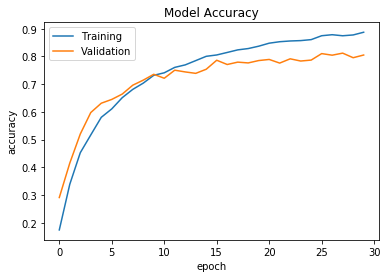

In [66]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'])


In [51]:
test_loss, test_accuracy = classifier.evaluate_generator(test_data, math.ceil(test_data.n / test_data.batch_size))
print("Accuracy on test set : {}".format(test_accuracy))

Accuracy on test set : 0.8712643680901363


In [52]:
validation_loss, validation_accuracy = classifier.evaluate_generator(validation_data, math.ceil(validation_data.n / validation_data.batch_size))
print("Accuracy on validation set: {}".format(validation_accuracy))

Accuracy on validation set: 0.8643678154068432


In [43]:
import tensorflow as tf

In [15]:
classifier_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(classifier_json)

classifier.save_weights("model.h5")
print("Model saved to disk")

NameError: name 'classifier' is not defined

In [2]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model.h5")
print('Loaded model from disk')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Loaded model from disk


In [3]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 32)        9248      
__________

In [4]:
loaded_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
key = cv2.waitKey(1)
webcam = cv2.VideoCapture(0)
i= 10
while True:
    check, frame = webcam.read()
    cv2.imshow("Capturing", frame)
    key = cv2.waitKey(1)
    x,y,w,h = 0,0,300,300
    cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)
    roi = frame[y:y+h, x:x+w]
    cv2.imshow("Capturing", frame)
    cv2.imwrite(filename='Images\\saved_img'+str(i)+'.jpg', img=roi)
    cv2.waitKey(3000)
    i += 1 
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
del webcam
cv2.destroyAllWindows()    

In [5]:
import numpy as np
from keras.preprocessing.image import img_to_array
cat_dir = "Images"
cat_files = os.listdir(cat_dir)

for file in cat_files:
    image = cv2.imread(os.path.join(cat_dir, file))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    src = cv2.Canny(blurred, 10, 150)
    dest = os.path.join(cat_dir, file)
    im = Image.fromarray(src)
    im.save(dest)
    


In [8]:
cat_dir = "Images"
cat_files = os.listdir(cat_dir)
sentence = ''
for i in cat_files:
    img = cv2.imread(os.path.join(cat_dir, i))
#     plt.imshow(img)
    dims = (64,64)
    img1 = cv2.resize(img, dims, interpolation=cv2.INTER_AREA)
    
    image = img1/255
    test_image = np.expand_dims(image, axis = 0)
    
    result = loaded_model.predict(test_image)
#   print(result)
    labels = np.argmax(result, axis=-1)  
    if labels[0] == 0:
        sentence += '0'
    elif labels[0] == 1:
        sentence += '1'
    elif labels[0] == 2:
        sentence += '2'
    elif labels[0] == 3:
        sentence += '3'
    elif labels[0] == 4:
        sentence += '4'
    elif labels[0] == 5:
        sentence += '5'
    elif labels[0] == 6:
        sentence += '6'
    elif labels[0] == 7:
        sentence += '7'
    elif labels[0] == 8:
        sentence += '8'
    elif labels[0] == 9:
        sentence += '9'
    elif labels[0] == 10:
        sentence += 'A'
    elif labels[0] == 11:
        sentence += 'B'
    elif labels[0] == 12:
        sentence += 'C'
    elif labels[0] == 13:
        sentence += 'D'
    elif labels[0] == 36:
        sentence = sentence[:-1]
    elif labels[0] == 14:
        sentence += 'E'
    elif labels[0] == 15:
        sentence += 'F'
    elif labels[0] == 16:
        sentence += 'G'
    elif labels[0] == 17:
        sentence += 'H'
    elif labels[0] == 18:
        sentence += 'I'
    elif labels[0] == 19:
        sentence += 'J'
    elif labels[0] == 20:
        sentence += 'K'
    elif labels[0] == 21:
        sentence += 'L'
    elif labels[0] == 22:
        sentence += 'M'
    elif labels[0] == 23:
        sentence += 'N'
    elif labels[0] == 37:
        sentence += ''
    elif labels[0] == 24:
        sentence += 'O'
    elif labels[0] == 25:
        sentence += 'P'
    elif labels[0] == 26:
        sentence += 'Q'
    elif labels[0] == 27:
        sentence += 'R'
    elif labels[0] == 28:
        sentence += 'S'
    elif labels[0] == 38:
        sentence += ' '
    elif labels[0] == 29:
        sentence += 'T'
    elif labels[0] == 30:
        sentence += 'U'
    elif labels[0] == 31:
        sentence += 'V'
    elif labels[0] == 32:
        sentence += 'W'
    elif labels[0] == 33:
        sentence += 'X'
    elif labels[0] == 34:
        sentence += 'Y'
    elif labels[0] == 35:
        sentence += 'Z'

print(sentence)

AMRBLHA


In [9]:
print("Enter:")
print("1 for English")
print("2 for Kannada")
print("3 for Hindi")
print("4 for Telugu")
lang = input()

Enter:
1 for English
2 for Kannada
3 for Hindi
4 for Telugu
1


In [10]:
if lang == '1':
    language = 'en'
elif lang == '2':
    language = 'kn'
elif lang == '3':
    language = 'hi'
elif lang == '4':
    language = 'te'
else:
    print('Please enter a proper value')

In [11]:
from google_trans_new import google_translator
translator = google_translator()
result = translator.translate(sentence.lower(), lang_tgt=language)

In [12]:
print(result)

Ambelha 


In [13]:
from gtts import gTTS

In [14]:
output = gTTS(text=result, lang=language, slow=False, tld='com')
output.save('speech.mp3')

os.system("start speech.mp3")

0